# Pengolahan Citra Digital Konvolusi

- Nama  = Muhammad Rizky Anugrah
- NIM   = 1306620089
- Kelas = Fisika - B
- Mata Kuliah = Pengolahan Citra Digital 

Tugas
1. Buktikan bahwa konvulusi sama dengan korelasi yang kernelnya diputar 180 derajat
2. Buatlah script perhitungan konvolusi secara langsung dan konvolusi dengan transformasi Fourier! Hitung waktu running untuk masing-masing proses konvolusi.

In [60]:
%matplotlib inline
from PIL import Image
from skimage.io import imread, imshow, show
import scipy.fftpack as fp
from scipy import ndimage, misc, signal
from scipy import stats
from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
import matplotlib.pylab as pylab
import numpy as np
import numpy.fft as fp
import timeit
from scipy import fftpack

In [61]:
def plot_image(image, title=''):
    pylab.title(title, size=20), pylab.imshow(image)
    pylab.axis('off') # comment this line if you want axis ticks

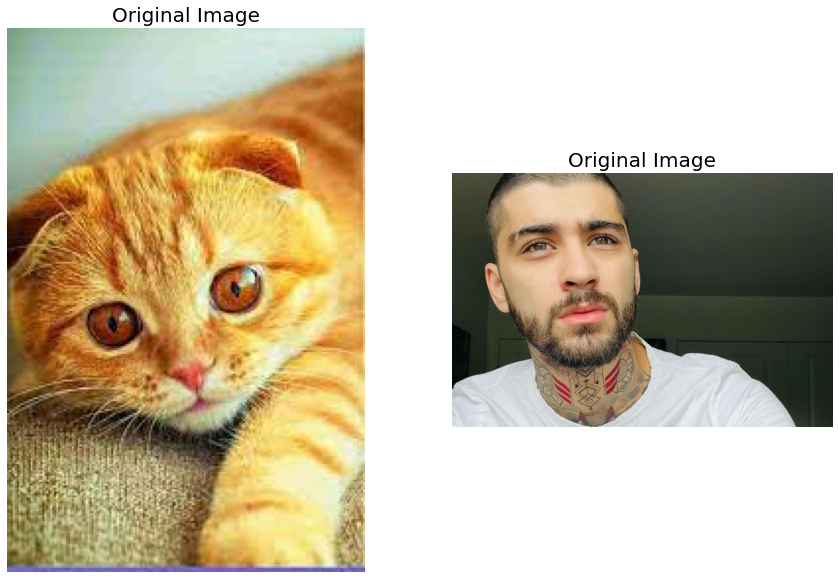

In [62]:
pylab.figure(figsize=(15,10))
plt.subplot(1,2,1)
im = Image.open("KUCING EPOS.jpg")
plot_image(im, 'Original Image')
plt.subplot(1,2,2)
im = Image.open("Zayn Malik.jpg")
plot_image(im, 'Original Image')

## Nomor 1

In [63]:
image1 = imread('KUCING EPOS.jpg')
image2 = imread('Zayn Malik.jpg')

In [64]:
im1 = rgb2gray(image1)
im2 = rgb2gray(image2)

In [65]:
blur_box_kernel = np.ones((3,3)) / 9
edge_laplace_kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])
gauss_blur = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/ 16

In [66]:
im_cor1 = signal.correlate2d(im1, edge_laplace_kernel)
im_conv1 = signal.convolve2d(im1, edge_laplace_kernel)
im_cor2 = signal.correlate2d(im2, edge_laplace_kernel)
im_conv2 = signal.convolve2d(im2, edge_laplace_kernel)

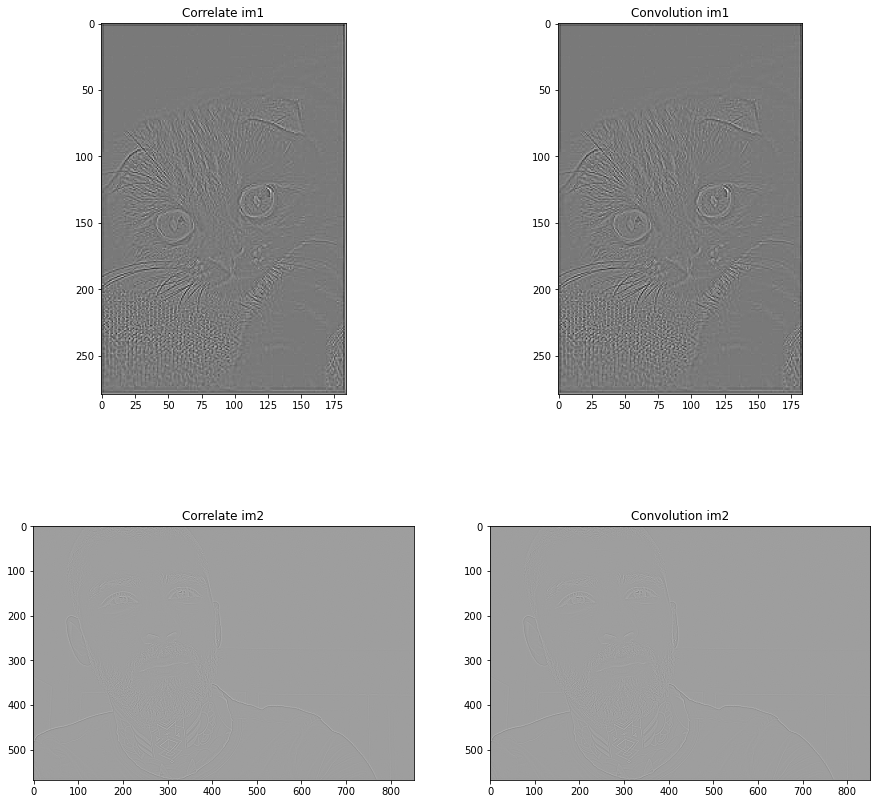

In [67]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title('Correlate im1')
plt.imshow(im_cor1, cmap='gray')
plt.subplot(2,2,2)
plt.title('Convolution im1')
plt.imshow(im_conv1, cmap='gray')
plt.subplot(2,2,3)
plt.title('Correlate im2')
plt.imshow(im_cor2, cmap='gray')
plt.subplot(2,2,4)
plt.title('Convolution im2')
plt.imshow(im_conv2, cmap='gray')

## Nomor 2

## Secara Langsung

In [68]:
def convolve2D(image, kernel, padding=0, strides=1):
    kernel = np.flipud(np.fliplr(kernel))
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image
    for y in range(image.shape[1]):
        if y > image.shape[1] - yKernShape:
            break
        if y % strides == 0:
            for x in range(image.shape[0]):
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break
    return output

In [69]:
%%time
a = 0
b = 1
im_man_box1 = convolve2D(im1, blur_box_kernel, padding = a, strides = b)
im_man_lap1 = convolve2D(im1, edge_laplace_kernel, padding = a, strides = b)
im_man_gauss1 = convolve2D(im1, gauss_blur, padding = a, strides = b)
im_man_box2 = convolve2D(im2, blur_box_kernel, padding = a, strides = b)
im_man_lap2 = convolve2D(im2, edge_laplace_kernel, padding = a, strides = b)
im_man_gauss2 = convolve2D(im2, gauss_blur, padding = a, strides = b)

Wall time: 10.9 s


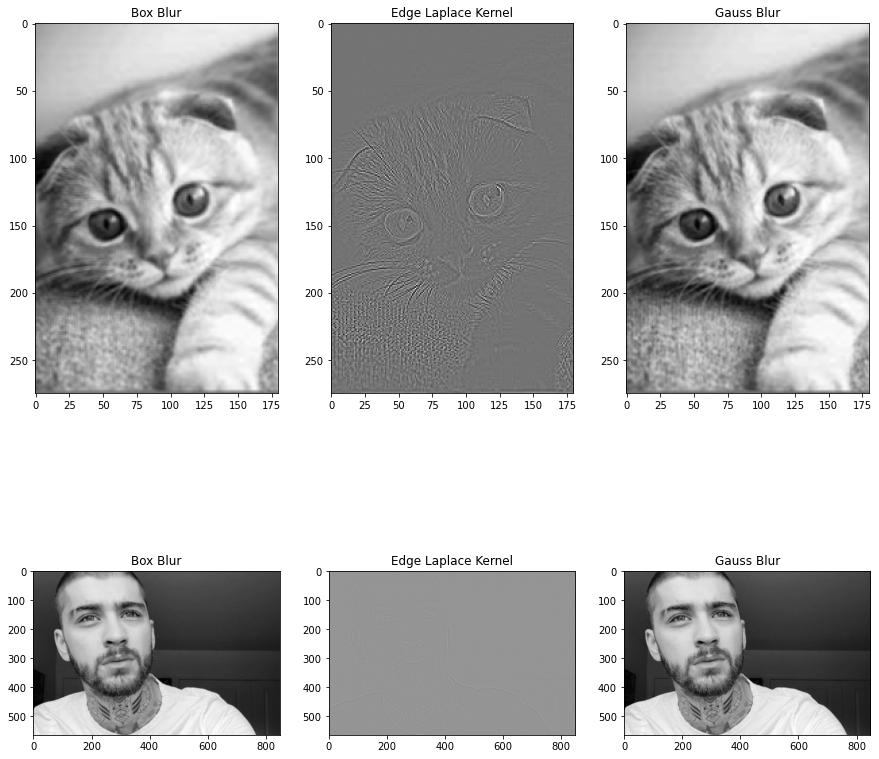

In [70]:
plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
plt.title('Box Blur')
plt.imshow(im_man_box1, cmap='gray')
plt.subplot(2,3,2)
plt.title('Edge Laplace Kernel')
plt.imshow(im_man_lap1, cmap='gray')
plt.subplot(2,3,3)
plt.title('Gauss Blur')
plt.imshow(im_man_gauss1, cmap='gray')
plt.subplot(2,3,4)
plt.title('Box Blur')
plt.imshow(im_man_box2, cmap='gray')
plt.subplot(2,3,5)
plt.title('Edge Laplace Kernel')
plt.imshow(im_man_lap2, cmap='gray')
plt.subplot(2,3,6)
plt.title('Gauss Blur')
plt.imshow(im_man_gauss2, cmap='gray')

## FFT

In [71]:
def conv_fft(x,y):
    s1 = np.array(x.shape)
    s2 = np.array(y.shape)
    size = s1 + s2 - 1
    fsize = 2 ** np.ceil(np.log2(size)).astype(int)
    fslice = tuple([slice(0, int(sz)) for sz in size])
    new_x = np.fft.fft2(x , fsize)
    new_y = np.fft.fft2(y , fsize)
    result = np.fft.ifft2(new_x*new_y)[fslice].copy()
    return np.absolute(result)

In [72]:
%%time
im_fft_box1 = conv_fft(im1, blur_box_kernel)
im_fft_lap1 = conv_fft(im1, edge_laplace_kernel)
im_fft_gauss1 = conv_fft(im1, gauss_blur)
im_fft_box2 = conv_fft(im2, blur_box_kernel)
im_fft_lap2 = conv_fft(im2, edge_laplace_kernel)
im_fft_gauss2 = conv_fft(im2, gauss_blur)

Wall time: 464 ms


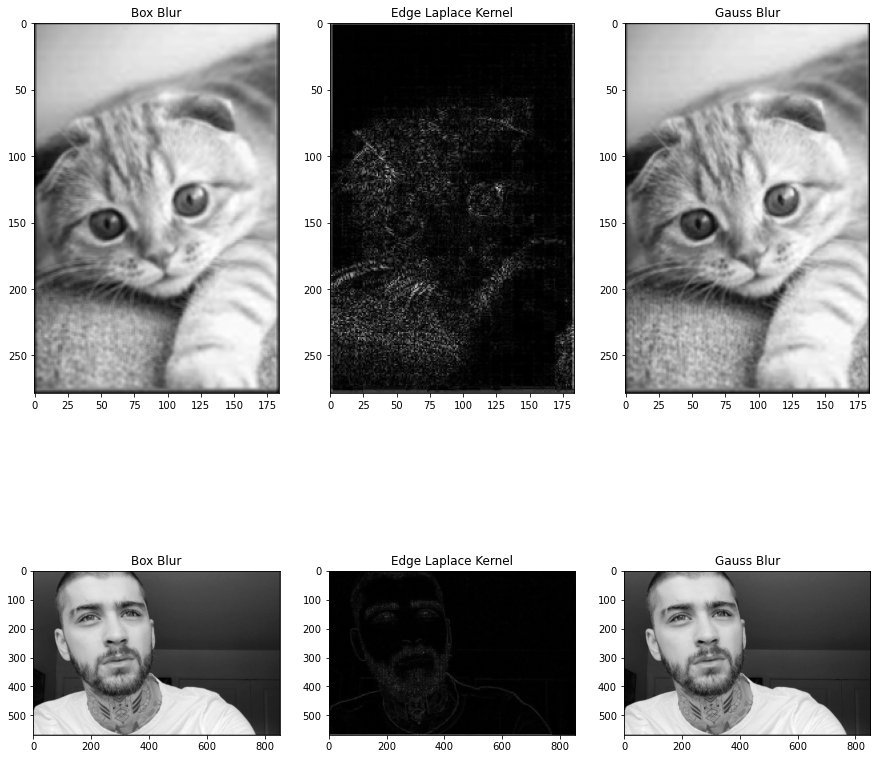

In [73]:
plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
plt.title('Box Blur')
plt.imshow(im_fft_box1, cmap='gray')
plt.subplot(2,3,2)
plt.title('Edge Laplace Kernel')
plt.imshow(im_fft_lap1, cmap='gray')
plt.subplot(2,3,3)
plt.title('Gauss Blur')
plt.imshow(im_fft_gauss1, cmap='gray')
plt.subplot(2,3,4)
plt.title('Box Blur')
plt.imshow(im_fft_box2, cmap='gray')
plt.subplot(2,3,5)
plt.title('Edge Laplace Kernel')
plt.imshow(im_fft_lap2, cmap='gray')
plt.subplot(2,3,6)
plt.title('Gauss Blur')
plt.imshow(im_fft_gauss2, cmap='gray')

Waktu running untuk masing-masing proses konvolusi
1. Secara Langsung = 10.9 s
2. FFT = 464 ms